In [5]:
import pandas as pd
import networkx as nx

In [6]:
book1 = pd.read_csv('datasets/book1.csv')
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [7]:
G_book1 = nx.Graph()   #Graph object

In [8]:
for _,edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [ ]:
#using degree centrality

In [9]:
deg_cen_book1 = nx.degree_centrality(books[0])

In [10]:
deg_cen_book5 = nx.degree_centrality(books[4])

In [13]:
#sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]
print(sorted_deg_cen_book1)
print('===================================')
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


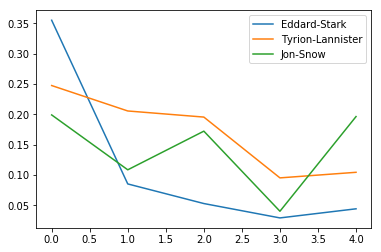

In [14]:
%matplotlib inline
evol = [nx.degree_centrality(book) for book in books]
degree_evol_df = pd.DataFrame.from_records(evol)

#degree centrality of Ned Stark, Tyrion Lannister and JonSnow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

In [15]:
#We can see that degree centrality is not an appropriate measure since the evolution of characters varies over time. 
#Hugely important Characters like Ned stark fade over time and are not important any longer hence we need to take some
#other measure

In [16]:
#Using Betweeness centality

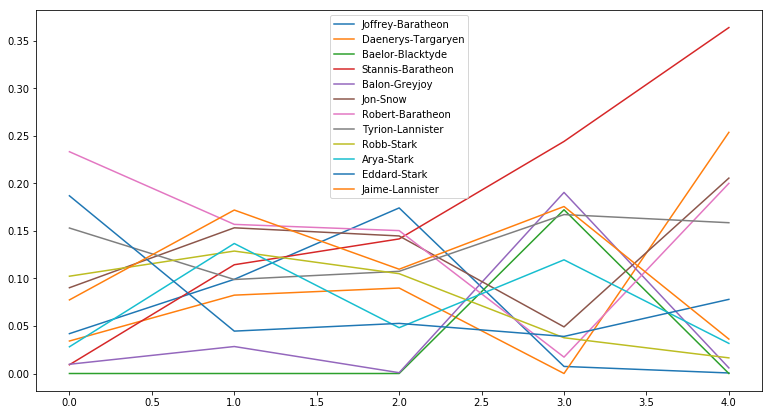

In [17]:
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index)) #Top4 characters from each book
list_of_char = list(set_of_char)

betweenness_evol_df[list_of_char].plot(figsize=(13,7))

In [18]:
#Using Google Pagerank

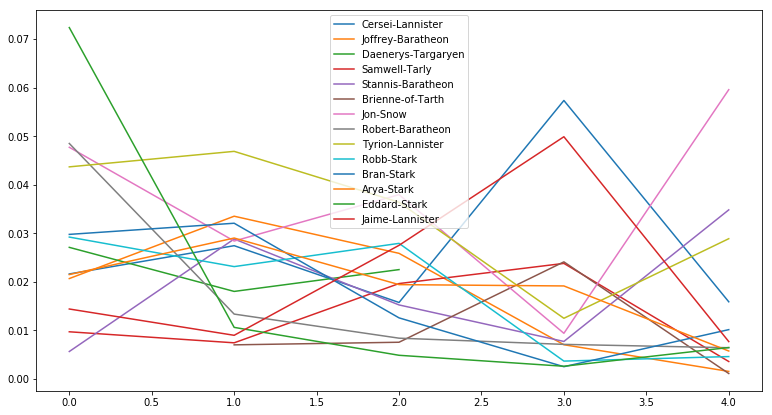

In [19]:
evol = [nx.pagerank(book) for book in books]
pagerank_evol_df = pd.DataFrame(evol)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index)) #Top4 characters from each book
list_of_char = list(set_of_char)

pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

In [20]:
#Finding correlation

In [21]:
measures = [nx.pagerank(books[4]), nx.betweenness_centrality(books[4], weight='weight'), nx.degree_centrality(books[4])]
cor = pd.DataFrame.from_records(measures)

cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [41]:
#Top 5 characters according to Degree Centrality
print(betweenness_evol_df.T[i].sort_values(ascending=False)[0:5])

Stannis-Baratheon     0.364067
Daenerys-Targaryen    0.253818
Jon-Snow              0.205652
Robert-Baratheon      0.200129
Asha-Greyjoy          0.173994
Name: 4, dtype: float64


In [40]:
#Top 5 characters according to Betweeness Centrality
print(degree_evol_df.T[4].sort_values(ascending=False)[0:5])

Jon-Snow              0.196203
Daenerys-Targaryen    0.183544
Stannis-Baratheon     0.148734
Theon-Greyjoy         0.104430
Tyrion-Lannister      0.104430
Name: 4, dtype: float64


In [34]:
#Top 5 characters according to Google Pagerank
print(pagerank_evol_df.T[4].sort_values(ascending=False)[0:5])

Jon-Snow              0.059572
Daenerys-Targaryen    0.044292
Stannis-Baratheon     0.034819
Tyrion-Lannister      0.028882
Theon-Greyjoy         0.025041
Name: 4, dtype: float64
